##  Ml model to predict payment dates of invoice details and bucketise them according to there delay

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# creating dataframe(df) from my data

df = pd.read_csv("invoice_details.csv")
df.info()           # info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46118 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [3]:
df.nunique()

business_code                 6
cust_number                1428
name_customer              4313
clear_date                  397
buisness_year                 2
doc_id                    50000
posting_date                500
document_create_date        503
document_create_date.1      500
due_in_date                 539
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         45270
baseline_create_date        504
cust_payment_terms           73
invoice_id                49996
isOpen                        2
dtype: int64

In [4]:
df.dtypes                 #data types of columns in my data

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

# Preprocessing

In [5]:
# no. of null values in columns

df.isnull().sum()  

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3882
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [6]:
# dropping column which contains only null values in columns

df.drop(columns = ["area_business"], inplace = True)   
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ corp,2019-12-17 00:00:00,2019.0,1.930206e+09,2019-12-02,20191201,20191202,20191217.0,USD,RV,1.0,62093.13,20191202.0,NAA8,1.930206e+09,0
1,CA02,0140105578,GIZE systems,2019-10-15 00:00:00,2019.0,2.960583e+09,2019-09-25,20190925,20190925,20191014.0,CAD,RV,1.0,109900.19,20191004.0,CA10,2.960583e+09,0
2,U001,0200707822,PUBLI corp,2020-01-27 00:00:00,2020.0,1.930392e+09,2020-01-12,20200113,20200112,20200127.0,USD,RV,1.0,127097.84,20200112.0,NAA8,1.930392e+09,0
3,U001,0200744019,TARG trust,2020-01-30 00:00:00,2020.0,1.930396e+09,2020-01-17,20200114,20200117,20200201.0,USD,RV,1.0,18386.38,20200117.0,NAA8,1.930396e+09,0
4,U001,0200794332,COST systems,2019-10-18 00:00:00,2019.0,1.929952e+09,2019-10-04,20191002,20191004,20191019.0,USD,RV,1.0,8791.51,20191004.0,NAAX,1.929952e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200772670,ASSOCIAT llc,NaN,2020.0,1.930592e+09,2020-03-02,20200303,20200302,20200317.0,USD,RV,1.0,2612.48,20200302.0,NAU5,1.930592e+09,1
49996,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930676e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,47278.98,20200320.0,NAH4,1.930676e+09,1
49997,CA02,0140106408,WAL-M foundation,NaN,2020.0,2.960621e+09,2020-03-18,20200318,20200318,20200328.0,CAD,RV,1.0,56772.53,20200318.0,CA10,2.960621e+09,1
49998,U001,0200230690,DECA systems,NaN,2020.0,1.930600e+09,2020-03-04,20200304,20200304,20200324.0,USD,RV,1.0,726.30,20200301.0,NAM4,1.930600e+09,1


In [7]:
#creating dataframe whose all rows in clear_date column is null (df1) and copying df1 to assignment because I have to 
# predict assignments clear_date

df1 = df[df["clear_date"].isnull()]
assignment = df[df["clear_date"].isnull()]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3882 entries, 46118 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           3882 non-null   object 
 1   cust_number             3882 non-null   object 
 2   name_customer           3882 non-null   object 
 3   clear_date              0 non-null      object 
 4   buisness_year           3882 non-null   float64
 5   doc_id                  3882 non-null   float64
 6   posting_date            3882 non-null   object 
 7   document_create_date    3882 non-null   int64  
 8   document_create_date.1  3882 non-null   int64  
 9   due_in_date             3882 non-null   float64
 10  invoice_currency        3882 non-null   object 
 11  document type           3882 non-null   object 
 12  posting_id              3882 non-null   float64
 13  total_open_amount       3882 non-null   float64
 14  baseline_create_date    3882 non-nu

In [8]:
#creating dataframe whose rows in clear_date column is not null so that i can train my model with those data

df2 = df[df["clear_date"].isnull() != True]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46118 entries, 0 to 46117
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           46118 non-null  object 
 1   cust_number             46118 non-null  object 
 2   name_customer           46118 non-null  object 
 3   clear_date              46118 non-null  object 
 4   buisness_year           46118 non-null  float64
 5   doc_id                  46118 non-null  float64
 6   posting_date            46118 non-null  object 
 7   document_create_date    46118 non-null  int64  
 8   document_create_date.1  46118 non-null  int64  
 9   due_in_date             46118 non-null  float64
 10  invoice_currency        46118 non-null  object 
 11  document type           46118 non-null  object 
 12  posting_id              46118 non-null  float64
 13  total_open_amount       46118 non-null  float64
 14  baseline_create_date    46118 non-null

In [9]:
# no of null values in columns

df2.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                4
isOpen                    0
dtype: int64

In [10]:
#creating another dataframe and storing the data after dropping the row which have any null column because only four columns 
# have null values

df3 = df2.dropna() 

<module 'matplotlib.pyplot' from 'c:\\users\\kiit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

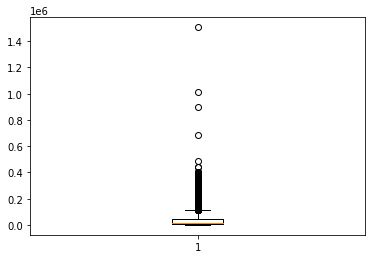

In [11]:
# graphs to detect outliers

plt.boxplot(x=df3["total_open_amount"])
plt

<module 'matplotlib.pyplot' from 'c:\\users\\kiit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

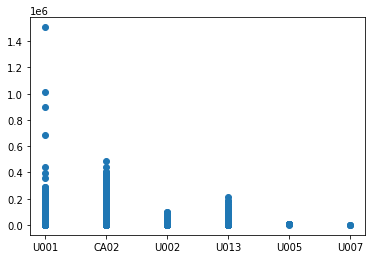

In [12]:
plt.scatter(df3["business_code"], df3["total_open_amount"])
plt

In [13]:
# minimum and maximum of df3["total_open_amount"]

min(df3["total_open_amount"]), max(df3["total_open_amount"])

(0.69, 1506680.64)

In [14]:
# maximum total_open_amount w.r.t to their business_code

df3.groupby("business_code")["total_open_amount"].max()

business_code
CA02     487872.00
U001    1506680.64
U002     100921.73
U005      10547.11
U007       3138.72
U013     214611.42
Name: total_open_amount, dtype: float64

In [15]:
#data present in rows w.r.t "business_code"

df3.groupby("business_code")["business_code"].count()

business_code
CA02     3562
U001    41771
U002      159
U005       14
U007        3
U013      605
Name: business_code, dtype: int64

In [16]:
# taking business_code CA02 max value as outlier upper limit counting outliers

df3[df3["total_open_amount"] > 487872.00].groupby("business_code")["business_code"].count()

business_code
U001    4
Name: business_code, dtype: int64

<module 'matplotlib.pyplot' from 'c:\\users\\kiit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

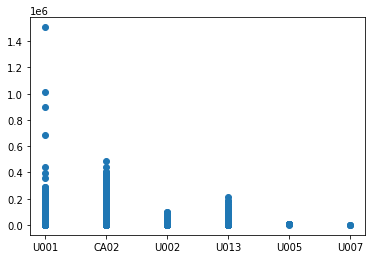

In [17]:
#now difference between consecutive points are less in this graph

plt.scatter(df3["business_code"], df3["total_open_amount"])
plt

<module 'matplotlib.pyplot' from 'c:\\users\\kiit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

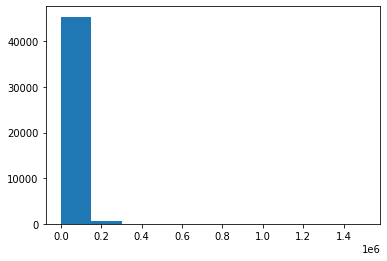

In [18]:
# to see my data is normally distributed or not

plt.hist(df3["total_open_amount"])
plt

<module 'matplotlib.pyplot' from 'c:\\users\\kiit\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

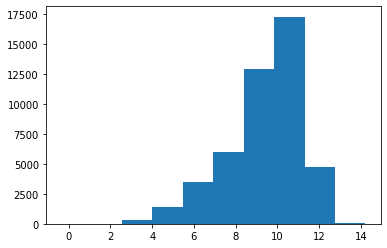

In [19]:
# to see my data is normally distributed or not after log transformation

y = np.log(df3["total_open_amount"])
plt.hist(y)
plt

In [20]:
#taking log transform on total_open_amount

df3["total_open_amount"] = np.log(df3["total_open_amount"])
df1["total_open_amount"] = np.log(df1["total_open_amount"])


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
# max value of my data w.r.t business_code after log tranformation of total_open_amount column

df3.groupby("business_code")["total_open_amount"].max()

business_code
CA02    13.097808
U001    14.225420
U002    11.522101
U005     9.263607
U007     8.051570
U013    12.276584
Name: total_open_amount, dtype: float64

In [22]:
df3.count()     # no of data in columns

business_code             46114
cust_number               46114
name_customer             46114
clear_date                46114
buisness_year             46114
doc_id                    46114
posting_date              46114
document_create_date      46114
document_create_date.1    46114
due_in_date               46114
invoice_currency          46114
document type             46114
posting_id                46114
total_open_amount         46114
baseline_create_date      46114
cust_payment_terms        46114
invoice_id                46114
isOpen                    46114
dtype: int64

In [23]:
#resetting index

assignment.reset_index(inplace = True, drop = True)

df1.reset_index(inplace = True, drop = True)
df2.reset_index(inplace = True, drop = True)
df3.reset_index(inplace = True, drop = True)

In [24]:
# sorting dataframe on the basis of document_create_date.1

df3.sort_values(["document_create_date.1"], inplace = True)
df3.reset_index(drop = True, inplace = True)

df1.sort_values(["document_create_date.1"], inplace = True)
df1.reset_index(drop = True, inplace = True)

assignment.sort_values(["document_create_date.1"], inplace = True)
assignment.reset_index(drop = True, inplace = True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [25]:
df1.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200974851,RESTA llc,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200318.0,USD,RV,1.0,6.825319,20200227.0,NAD1,1.930579e+09,1
1,U001,0200920735,ALBERT llc,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200502.0,USD,RV,1.0,8.222360,20200227.0,NAGD,1.930577e+09,1
2,U001,0200357714,US foundation,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,10.954602,20200227.0,NAA8,1.930579e+09,1
3,U001,0200881076,ALBERT trust,NaN,2020.0,1.930576e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,11.438738,20200227.0,NAA8,1.930576e+09,1
4,U001,0100031704,DELHAIZE,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200313.0,USD,RV,1.0,10.700868,20200227.0,NAA8,1.930568e+09,1


In [26]:
assignment.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200974851,RESTA llc,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200318.0,USD,RV,1.0,920.87,20200227.0,NAD1,1.930579e+09,1
1,U001,0200920735,ALBERT llc,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200502.0,USD,RV,1.0,3723.28,20200227.0,NAGD,1.930577e+09,1
2,U001,0200357714,US foundation,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,57216.74,20200227.0,NAA8,1.930579e+09,1
3,U001,0200881076,ALBERT trust,NaN,2020.0,1.930576e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,92849.73,20200227.0,NAA8,1.930576e+09,1
4,U001,0100031704,DELHAIZE,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200313.0,USD,RV,1.0,44394.37,20200227.0,NAA8,1.930568e+09,1


In [27]:
import datetime

# converting date columns in date time format which are in float format

df3["document_create_date.1"] = pd.to_datetime(df3["document_create_date.1"].astype(str), format='%Y%m%d')
df3["due_in_date"] = pd.to_datetime(df3["due_in_date"].astype(str), format = '%Y%m%d')
df3["clear_date"] = pd.to_datetime(df3["clear_date"])

df1["document_create_date.1"] = pd.to_datetime(df1["document_create_date.1"].astype(str), format='%Y%m%d')
df1["due_in_date"] = pd.to_datetime(df1["due_in_date"].astype(str), format = '%Y%m%d')
df1["clear_date"] = pd.to_datetime(df1["clear_date"])

df3.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928538e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,10.705092,20181230.0,NAH4,1.928538e+09,0
1,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928542e+09,2018-12-30,20181229,2018-12-30,2019-01-14,USD,RV,1.0,9.110484,20181230.0,NAH4,1.928542e+09,0
2,U001,0200750051,ALBER co,2019-01-14,2019.0,1.928543e+09,2018-12-30,20181230,2018-12-30,2019-01-14,USD,RV,1.0,11.356914,20181230.0,NAA8,1.928543e+09,0
3,CA02,0140105785,SHOPPE corporation,2019-01-18,2019.0,2.960520e+09,2018-12-30,20181230,2018-12-30,2019-01-12,CAD,RV,1.0,8.812486,20190102.0,CA10,2.960520e+09,0
4,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,20181228,2018-12-30,2019-01-29,USD,RV,1.0,10.247980,20181230.0,NAVE,1.991820e+09,0


In [28]:
# unique values in data

df3.nunique()

business_code                 6
cust_number                1396
name_customer              4206
clear_date                  397
buisness_year                 2
doc_id                    46114
posting_date                424
document_create_date        428
document_create_date.1      424
due_in_date                 496
invoice_currency              2
document type                 1
posting_id                    1
total_open_amount         41777
baseline_create_date        432
cust_payment_terms           70
invoice_id                46114
isOpen                        1
dtype: int64

In [29]:
# dropping column which have only one unique value

df3.drop(columns = ["document type", "posting_id", "isOpen"], inplace = True)
df1.drop(columns = ["document type", "posting_id", "isOpen"], inplace = True)

df3.nunique()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


business_code                 6
cust_number                1396
name_customer              4206
clear_date                  397
buisness_year                 2
doc_id                    46114
posting_date                424
document_create_date        428
document_create_date.1      424
due_in_date                 496
invoice_currency              2
total_open_amount         41777
baseline_create_date        432
cust_payment_terms           70
invoice_id                46114
dtype: int64

In [30]:
# dropping baseline_create_date and posting_date because we have to use clear date and create date

df3.drop(columns = ["baseline_create_date", "posting_date"], inplace = True)
df1.drop(columns = ["baseline_create_date", "posting_date"], inplace = True)

df3.nunique()

business_code                 6
cust_number                1396
name_customer              4206
clear_date                  397
buisness_year                 2
doc_id                    46114
document_create_date        428
document_create_date.1      424
due_in_date                 496
invoice_currency              2
total_open_amount         41777
cust_payment_terms           70
invoice_id                46114
dtype: int64

In [31]:
# dropping document_create_date because we have to use document_create_date.1

df3.drop(columns = ["document_create_date"], inplace = True)
df1.drop(columns = ["document_create_date"], inplace = True)

In [32]:
#renaming document_create_date.1 into create_date

df3.rename(columns = {"document_create_date.1": "create_date"}, inplace = True)
df1.rename(columns = {"document_create_date.1": "create_date"}, inplace = True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46114 entries, 0 to 46113
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       46114 non-null  object        
 1   cust_number         46114 non-null  object        
 2   name_customer       46114 non-null  object        
 3   clear_date          46114 non-null  datetime64[ns]
 4   buisness_year       46114 non-null  float64       
 5   doc_id              46114 non-null  float64       
 6   create_date         46114 non-null  datetime64[ns]
 7   due_in_date         46114 non-null  datetime64[ns]
 8   invoice_currency    46114 non-null  object        
 9   total_open_amount   46114 non-null  float64       
 10  cust_payment_terms  46114 non-null  object        
 11  invoice_id          46114 non-null  float64       
dtypes: datetime64[ns](3), float64(4), object(5)
memory usage: 4.2+ MB


# Splitting

In [34]:
#splitting data on the basis of date

X_train = df3[df3["create_date"] <= '2019-09-30'].copy()
X_temp = df3[df3["create_date"] > '2019-09-30'].copy()

X_validation = X_temp[X_temp["create_date"] <= '2019-11-15'].copy()
X_test = X_temp[X_temp["create_date"] > '2019-11-15'].copy()

In [35]:
# Resetting index

X_train.reset_index(drop = True, inplace = True)
X_validation.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

In [36]:
# Shape of data after splitting 

X_train.shape, X_validation.shape, X_test.shape

((31341, 12), (5292, 12), (9481, 12))

In [37]:
X_train.nunique()     # no. of unique values in each column

business_code             6
cust_number            1266
name_customer          3511
clear_date              281
buisness_year             1
doc_id                31341
create_date             275
due_in_date             343
invoice_currency          2
total_open_amount     28655
cust_payment_terms       64
invoice_id            31341
dtype: int64

In [38]:
X_train.dtypes   # data type of columns

business_code                 object
cust_number                   object
name_customer                 object
clear_date            datetime64[ns]
buisness_year                float64
doc_id                       float64
create_date           datetime64[ns]
due_in_date           datetime64[ns]
invoice_currency              object
total_open_amount            float64
cust_payment_terms            object
invoice_id                   float64
dtype: object

# EDA and Feature Engineering

In [39]:
#difference between due_date and clear_date
# clear_date >= due_in_date >= create_date >=< baseline_create_date >= posting_date

#train
X_train["diff_duedate_crdate"] = (X_train["due_in_date"]-X_train["create_date"]).dt.days
X_train["diff_cldate_duedate"] = (X_train["clear_date"] - X_train["due_in_date"]).dt.days  # target column

#validation
X_validation["diff_duedate_crdate"] = (X_validation["due_in_date"] - X_validation["create_date"]).dt.days
X_validation["diff_cldate_duedate"] = (X_validation["clear_date"] - X_validation["due_in_date"]).dt.days

#test
X_test["diff_duedate_crdate"] = (X_test["due_in_date"] - X_test["create_date"]).dt.days
X_test["diff_cldate_duedate"] = (X_test["clear_date"] - X_test["due_in_date"]).dt.days

#df1
df1["diff_duedate_crdate"] = (df3["due_in_date"] - df3["create_date"]).dt.days
df1["diff_cldate_duedate"] = (df3["clear_date"] - df3["due_in_date"]).dt.days

X_train.head()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,diff_duedate_crdate,diff_cldate_duedate
0,U001,0200769623,WAL-MAR foundation,2019-01-09,2019.0,1.928538e+09,2018-12-30,2019-01-14,USD,10.705092,NAH4,1.928538e+09,15,-5
1,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928542e+09,2018-12-30,2019-01-14,USD,9.110484,NAH4,1.928542e+09,15,-4
2,U001,0200750051,ALBER co,2019-01-14,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,11.356914,NAA8,1.928543e+09,15,0
3,CA02,0140105785,SHOPPE corporation,2019-01-18,2019.0,2.960520e+09,2018-12-30,2019-01-12,CAD,8.812486,CA10,2.960520e+09,13,6
4,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2019-01-29,USD,10.247980,NAVE,1.991820e+09,30,30


In [40]:
#dropping those column whose due_date is less than create date

index_no_train = X_train[X_train["diff_cldate_duedate"]<0].index
X_train.drop(index_no_train, inplace= True)

index_no_validation = X_validation[X_validation["diff_cldate_duedate"]<0].index
X_validation.drop(index_no_validation, inplace= True)

index_no_test = X_test[X_test["diff_cldate_duedate"]<0].index
X_test.drop(index_no_test, inplace= True)

#resetting index

X_train.reset_index(drop = True, inplace = True)
X_validation.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)

X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,diff_duedate_crdate,diff_cldate_duedate
0,U001,0200750051,ALBER co,2019-01-14,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,11.356914,NAA8,1.928543e+09,15,0
1,CA02,0140105785,SHOPPE corporation,2019-01-18,2019.0,2.960520e+09,2018-12-30,2019-01-12,CAD,8.812486,CA10,2.960520e+09,13,6
2,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2019-01-29,USD,10.247980,NAVE,1.991820e+09,30,30
3,U001,CCU013,KRAFT F corp,2019-03-01,2019.0,1.928517e+09,2018-12-30,2018-12-30,USD,6.839830,NAX2,1.928517e+09,0,61
4,U001,0200711029,WEGMAN co,2019-01-14,2019.0,1.928543e+09,2018-12-30,2019-01-14,USD,9.799018,NAA8,1.928543e+09,15,0


In [41]:
#dropping doc_id and invoice_id 

X_train.drop(columns = ["doc_id", "invoice_id"], inplace = True)
X_validation.drop(columns = ["doc_id", "invoice_id"], inplace = True)
X_test.drop(columns = ["doc_id", "invoice_id"], inplace = True)

df1.drop(columns = ["doc_id", "invoice_id"], inplace = True)

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
X_train.dtypes    # data type of columns

business_code                  object
cust_number                    object
name_customer                  object
clear_date             datetime64[ns]
buisness_year                 float64
create_date            datetime64[ns]
due_in_date            datetime64[ns]
invoice_currency               object
total_open_amount             float64
cust_payment_terms             object
diff_duedate_crdate             int64
diff_cldate_duedate             int64
dtype: object

In [43]:
#extracting month, year, day of week from data

#create_date
X_train["cr_weekday"] = X_train["create_date"].dt.dayofweek                    #train
X_train["cr_month"] = X_train["create_date"].dt.month
X_train["cr_year"] = X_train["create_date"].dt.year

X_validation["cr_weekday"] = X_validation["create_date"].dt.dayofweek          #validation
X_validation["cr_month"] = X_validation["create_date"].dt.month
X_validation["cr_year"] = X_validation["create_date"].dt.year

X_test["cr_weekday"] = X_test["create_date"].dt.dayofweek                      #test
X_test["cr_month"] = X_test["create_date"].dt.month
X_test["cr_year"] = X_test["create_date"].dt.year

df1["cr_weekday"] = df1["create_date"].dt.dayofweek                      #test
df1["cr_month"] = df1["create_date"].dt.month
df1["cr_year"] = df1["create_date"].dt.year

#due_in_date
X_train["due_weekday"] = X_train["due_in_date"].dt.dayofweek                   #train
X_train["due_month"] = X_train["due_in_date"].dt.month
X_train["due_year"] = X_train["due_in_date"].dt.year

X_validation["due_weekday"] = X_validation["due_in_date"].dt.dayofweek         #validation
X_validation["due_month"] = X_validation["due_in_date"].dt.month
X_validation["due_year"] = X_validation["due_in_date"].dt.year

X_test["due_weekday"] = X_test["due_in_date"].dt.dayofweek                     #test
X_test["due_month"] = X_test["due_in_date"].dt.month
X_test["due_year"] = X_test["due_in_date"].dt.year

df1["due_weekday"] = df1["due_in_date"].dt.dayofweek                      #test
df1["due_month"] = df1["due_in_date"].dt.month
df1["due_year"] = df1["due_in_date"].dt.year


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [44]:
# mapping invoice currency in 1 and 0 because only two unique values in invoice_currency

X_train["invoice_currency"] = X_train["invoice_currency"].copy().map({'USD' : 1, 'CAD' : 0})
X_validation["invoice_currency"] = X_validation["invoice_currency"].copy().map({'USD' : 1, 'CAD' : 0})
X_test["invoice_currency"] = X_test["invoice_currency"].copy().map({'USD' : 1, 'CAD' : 0})

df1["invoice_currency"] = df1["invoice_currency"].map({'USD' : 1, 'CAD' : 0})

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [45]:
# extracting First name of the name_customer and storing back to name_customer

X_train["name_customer"]= X_train.name_customer.str.split(' ').str[0].copy()
X_validation["name_customer"]= X_validation.name_customer.str.split(' ').str[0].copy()
X_test["name_customer"]= X_test.name_customer.str.split(' ').str[0].copy()

df1["name_customer"]= df1.name_customer.str.split(' ').str[0].copy()

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [46]:
# extracting first five digit of cust_number and storing back to cust_number

X_train["cust_number"] = X_train.cust_number.str[:5]
X_validation["cust_number"] = X_validation.cust_number.str[:5]
X_test["cust_number"] = X_test.cust_number.str[:5]

df1["cust_number"] = df1.cust_number.str[:5]


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [47]:
# column whose data type is object

object_type = X_train.select_dtypes(include = "object").columns
object_type

Index(['business_code', 'cust_number', 'name_customer', 'cust_payment_terms'], dtype='object')

In [48]:
# feature engineering rare labe encoding on object type columns

from feature_engine.encoding import RareLabelEncoder
encoder = RareLabelEncoder(tol=0.005, n_categories=5, variables= list(object_type) , replace_with='Rare')
encoder.fit(X_train)
X_train = encoder.transform(X_train)
X_validation = encoder.transform(X_validation)
X_test = encoder.transform(X_test)

df1 = encoder.transform(df1)
encoder.encoder_dict_


{'business_code': Index(['U001', 'CA02', 'U013'], dtype='object'),
 'cust_number': Index(['02007', '01401', '01000', '02009', '02004', 'CCU01', '02008', '02001',
        '02003', 'CCCA0', '02005', '20076', '02000', '02002', '14010', '20072',
        '20070', '20079', '20074', 'CCU00', '02006'],
       dtype='object'),
 'name_customer': Index(['WAL-MAR', 'BJ'S', 'SA', 'C&S', 'KRAFT', 'SYSCO', 'TARG', 'KROGER',
        'ASSOCIAT', 'PUBLI', 'SUPE', 'US', 'MEIJ', 'WAL-M', 'COST', 'SYSC',
        'AM', 'WINC', 'LOB', 'COSTCO', 'DELHAIZE', 'MCL', 'DOT', 'RESTA',
        'DOLLA', 'SAFEW', 'SO', 'ALBERT', 'DEC', 'SMITH'S', 'DECA', 'RA', 'M',
        'WAKE', 'GORDON', 'H', 'KROGE', 'JRD', 'OK', 'UNIFIE'],
       dtype='object'),
 'cust_payment_terms': Index(['NAA8', 'NAH4', 'CA10', 'NAC6', 'NAG2', 'NAU5', 'NAX2', 'NAD1', 'NAGD',
        'NAAX', 'NA32', 'NAD5', 'NA10', 'NAM2', 'NAM1', 'NAVF'],
       dtype='object')}

In [49]:
X_train[object_type].nunique()    # no of unique data after encoding

business_code          4
cust_number           22
name_customer         41
cust_payment_terms    17
dtype: int64

In [50]:
# label encoding 

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels.
for i in object_type:
    label_encoder = preprocessing.LabelEncoder() 

    # Encode labels in column 'species'. 
    X_train[i] = label_encoder.fit_transform(X_train[i])
    X_validation[i] = label_encoder.fit_transform(X_validation[i])
    X_test[i] = label_encoder.fit_transform(X_test[i])
    
    df1[i] = label_encoder.fit_transform(df1[i]) 

In [51]:
# dropping business year because it is nan in correlation with every column

X_train.drop(columns = ["buisness_year"], inplace = True)
X_validation.drop(columns = ["buisness_year"], inplace = True)
X_test.drop(columns = ["buisness_year"], inplace = True)

df1.drop(columns = ["buisness_year"], inplace = True)

In [52]:
X_train.corr()

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,diff_duedate_crdate,diff_cldate_duedate,cr_weekday,cr_month,cr_year,due_weekday,due_month,due_year
business_code,1.000000,0.454950,-0.065407,0.975364,-0.100515,0.421264,0.144249,-0.073452,-0.008188,-0.018637,0.000480,-0.039784,0.002879,-0.003870
cust_number,0.454950,1.000000,-0.053583,0.467442,-0.056044,0.333053,0.024215,0.167702,0.032605,-0.039064,0.009911,-0.019308,-0.033960,-0.019267
name_customer,-0.065407,-0.053583,1.000000,-0.070134,0.151021,-0.017098,0.033624,0.025314,0.036049,0.000945,-0.004015,0.015008,0.004442,0.003690
invoice_currency,0.975364,0.467442,-0.070134,1.000000,-0.102598,0.388023,0.118378,-0.098075,-0.010737,-0.020419,0.000772,-0.043622,-0.002469,-0.004151
total_open_amount,-0.100515,-0.056044,0.151021,-0.102598,1.000000,-0.110743,-0.054571,-0.092143,0.002322,-0.000194,0.013973,0.031531,-0.002551,0.020748
cust_payment_terms,0.421264,0.333053,-0.017098,0.388023,-0.110743,1.000000,0.307263,0.235482,0.070523,0.004195,0.002409,-0.024894,0.049027,-0.030602
diff_duedate_crdate,0.144249,0.024215,0.033624,0.118378,-0.054571,0.307263,1.000000,-0.042734,0.012191,0.002710,0.008317,0.003141,0.149483,0.023517
diff_cldate_duedate,-0.073452,0.167702,0.025314,-0.098075,-0.092143,0.235482,-0.042734,1.000000,0.040791,-0.027558,-0.008056,0.042360,-0.035419,-0.047393
cr_weekday,-0.008188,0.032605,0.036049,-0.010737,0.002322,0.070523,0.012191,0.040791,1.000000,-0.005817,-0.009568,0.286188,-0.004026,-0.014011
cr_month,-0.018637,-0.039064,0.000945,-0.020419,-0.000194,0.004195,0.002710,-0.027558,-0.005817,1.000000,-0.181544,-0.023805,0.929173,-0.015272


<AxesSubplot:>

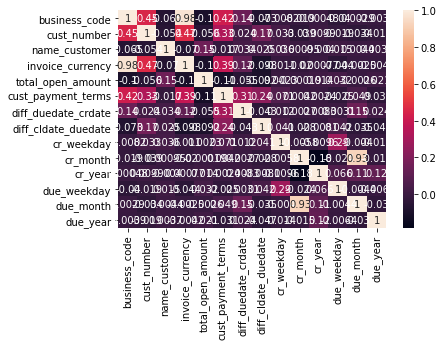

In [53]:
# heat map of correlation of data

sns.heatmap(X_train.corr(), annot = True)

In [54]:
# seperating data into dependent and independent variable

Y_train = X_train["diff_cldate_duedate"]
X_train = X_train.drop(columns = ["diff_cldate_duedate"])

Y_validation = X_validation["diff_cldate_duedate"]
X_validation = X_validation.drop(columns = ["diff_cldate_duedate"])

Y_test = X_test["diff_cldate_duedate"]
X_test = X_test.drop(columns = ["diff_cldate_duedate"])

In [55]:
# features selected by me for model

features = ['business_code', 'invoice_currency', 'cust_payment_terms', 'diff_duedate_crdate', 'cust_number', 'due_weekday']

# Model and Prediction 

In [56]:
#importing Random Forest Regressor module

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

In [57]:
# Fitting Random Forest Regressor Tree to the Training Set
clf = RandomForestRegressor()
clf.fit(X_train[features], Y_train)

# Predicting the Test and validation Set Results
predicted_validation = clf.predict(X_validation[features])
predicted_test = clf.predict(X_test[features])

# rmse
print("Rmse validation: ",math.sqrt(mean_squared_error(Y_validation, predicted_validation)))
print("Rmse Test: ",math.sqrt(mean_squared_error(Y_test, predicted_test)))
print("Mse validation: ",(mean_squared_error(Y_validation, predicted_validation)))
print("Mse Test: ",(mean_squared_error(Y_test, predicted_test)))

Rmse validation:  6.27961364411316
Rmse Test:  6.716678240462155
Mse validation:  39.43354751933216
Mse Test:  45.113766585897785


In [58]:
assignment

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200974851,RESTA llc,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200318.0,USD,RV,1.0,920.87,20200227.0,NAD1,1.930579e+09,1
1,U001,0200920735,ALBERT llc,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200502.0,USD,RV,1.0,3723.28,20200227.0,NAGD,1.930577e+09,1
2,U001,0200357714,US foundation,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,57216.74,20200227.0,NAA8,1.930579e+09,1
3,U001,0200881076,ALBERT trust,NaN,2020.0,1.930576e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,92849.73,20200227.0,NAA8,1.930576e+09,1
4,U001,0100031704,DELHAIZE,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200313.0,USD,RV,1.0,44394.37,20200227.0,NAA8,1.930568e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,U001,200769623,WAL-MAR in,NaN,2020.0,1.930891e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,19303.40,20200512.0,NAH4,1.930891e+09,1
3878,U001,200769623,WAL-MAR,NaN,2020.0,1.930884e+09,2020-05-12,20200510,20200512,20200527.0,USD,RV,1.0,81161.92,20200512.0,NAH4,1.930884e+09,1
3879,U001,0200806580,BE co,NaN,2020.0,1.930886e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,34488.00,20200512.0,NAA8,1.930886e+09,1
3880,U001,200769623,WAL-MAR in,NaN,2020.0,1.930885e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,30338.28,20200512.0,NAH4,1.930885e+09,1


In [59]:
# predicting diff_cldate_duedate for the data whose clear date I have to predict

df1["diff_cldate_duedate"] = clf.predict(df1[features])

In [60]:
# rounding off the predicted values because days only take integer values

df1['diff_cldate_duedate'] = df1['diff_cldate_duedate'].apply(np.ceil)

In [61]:
# adding predicted days to due_date for clear_date 

df1["clear_date"] = df1["due_in_date"] + df1['diff_cldate_duedate'].apply(lambda x: pd.Timedelta(x, unit='D'))

In [62]:
df1

,business_code,cust_number,name_customer,clear_date,create_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,diff_duedate_crdate,diff_cldate_duedate,cr_weekday,cr_month,cr_year,due_weekday,due_month,due_year
0,2,11,25,2020-03-19,2020-02-27,2020-03-18,1,6.825319,6,15,1.0,3,2,2020,2,3,2020
1,2,11,0,2020-05-06,2020-02-27,2020-05-02,1,8.222360,9,15,4.0,3,2,2020,5,5,2020
2,2,5,36,2020-03-15,2020-02-27,2020-03-13,1,10.954602,3,15,2.0,3,2,2020,4,3,2020
3,2,10,0,2020-03-14,2020-02-27,2020-03-13,1,11.438738,3,13,1.0,3,2,2020,4,3,2020
4,2,0,9,2020-03-26,2020-02-27,2020-03-13,1,10.700868,3,30,13.0,3,2,2020,4,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,2,16,39,2020-05-29,2020-05-12,2020-05-27,1,9.868037,10,15,2.0,1,5,2020,2,5,2020
3878,2,16,39,2020-05-29,2020-05-12,2020-05-27,1,11.304201,10,15,2.0,1,5,2020,2,5,2020
3879,2,10,26,2020-06-03,2020-05-12,2020-05-27,1,10.448367,3,65,7.0,1,5,2020,2,5,2020
3880,2,16,39,2020-05-29,2020-05-12,2020-05-27,1,10.320166,10,12,2.0,1,5,2020,2,5,2020


In [63]:
#bucketisation function

def bucketisation(value):
    if value > 60:
        return ">60 days"
    elif value > 45:
        return "46-60 days"
    elif value > 30:
        return "31-45 days"
    elif value > 15:
        return "16-30 days"
    elif value >=0:
        return "0-15 days"

In [64]:
# bucketisation of data


X_train["Aging_Bucket"] = Y_train.apply(bucketisation)
X_validation["Aging_Bucket"] = Y_validation.apply(bucketisation)
X_test["Aging_Bucket"] = Y_test.apply(bucketisation)

df1["Aging_Bucket"] = df1['diff_cldate_duedate'].apply(bucketisation)

In [65]:
# now storing values in the original data which was provide and have null values

assignment["predicted_payment_date"] = df1["clear_date"]
assignment["Aging_Bucket"] = df1["Aging_Bucket"]

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Final data which had null value in clear_date

In [66]:
# final presentation for those data which have null values in clear_date
assignment

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_payment_date,Aging_Bucket
0,U001,0200974851,RESTA llc,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200318.0,USD,RV,1.0,920.87,20200227.0,NAD1,1.930579e+09,1,2020-03-19,0-15 days
1,U001,0200920735,ALBERT llc,NaN,2020.0,1.930577e+09,2020-02-27,20200227,20200227,20200502.0,USD,RV,1.0,3723.28,20200227.0,NAGD,1.930577e+09,1,2020-05-06,0-15 days
2,U001,0200357714,US foundation,NaN,2020.0,1.930579e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,57216.74,20200227.0,NAA8,1.930579e+09,1,2020-03-15,0-15 days
3,U001,0200881076,ALBERT trust,NaN,2020.0,1.930576e+09,2020-02-27,20200227,20200227,20200313.0,USD,RV,1.0,92849.73,20200227.0,NAA8,1.930576e+09,1,2020-03-14,0-15 days
4,U001,0100031704,DELHAIZE,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200313.0,USD,RV,1.0,44394.37,20200227.0,NAA8,1.930568e+09,1,2020-03-26,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,U001,200769623,WAL-MAR in,NaN,2020.0,1.930891e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,19303.40,20200512.0,NAH4,1.930891e+09,1,2020-05-29,0-15 days
3878,U001,200769623,WAL-MAR,NaN,2020.0,1.930884e+09,2020-05-12,20200510,20200512,20200527.0,USD,RV,1.0,81161.92,20200512.0,NAH4,1.930884e+09,1,2020-05-29,0-15 days
3879,U001,0200806580,BE co,NaN,2020.0,1.930886e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,34488.00,20200512.0,NAA8,1.930886e+09,1,2020-06-03,0-15 days
3880,U001,200769623,WAL-MAR in,NaN,2020.0,1.930885e+09,2020-05-12,20200511,20200512,20200527.0,USD,RV,1.0,30338.28,20200512.0,NAH4,1.930885e+09,1,2020-05-29,0-15 days


# Data Dictionary for my variables

df : Total data after reading from file

df1 : Data in which clear_date have only null data

assignment : original df1 so that after all opeaions happen the predicted data will be store in it

df2 : df - df1

df3 : df2 data after droping rows whose any column is null

create_date : rename of document_create_date

diff_duedate_crdate : difference between due_in_date and create_date  

diff_cldate_duedate :difference between clear_date and due_in_date in other word delay column

cr_weekday : weekday of create_date

cr_month   : month of create_date

cr_year    : year of create_date

due_weekday : weekday of due_in_date

due_month   : month of due_in_date

due_year    : year of due_in_date

Aging_Bucket : aging bucket accordig to delay

predicted_payment_date : payment date predicted by my model